# Exercício 2

<br>
<div style="font-size: 16px; color: #0B0959">

1. (1.0) Calcule os polinômios $ p_x(t), p_y(t), p_z(t) $ nos pontos $ t_j^* := j/50, j = 0, 1, ..., 50$. Mostre os valores calculados em uma tabela.
</div>

Primeiro, foi definido as listas de $ x_i, y_i, z_i $ e um data frame para melhor vizualização

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#definicao do conjunto de dados 
t = [0.000, 0.125, 0.250, 0.375, 0.500, 0.625, 0.750, 0.875, 1.000]
x = [0.7416, 0.2685, 0.3333, 0.3982, -0.0749, -0.3089, 0.3333, 0.9756, 0.7416]
y = [0.7416, 0.9756, 0.3333, -0.3089, -0.0749, 0.3982, 0.3333, 0.2685, 0.7416]
z = [-0.4832, -0.2441, 0.3334, 0.9107, 1.1498, 0.9107, 0.3334, -0.2441, -0.4832]

#construção do data frame com o conjunto de dados
dados = pd.DataFrame([t, x, y, z]).set_index([['t', 'x', 'y', 'z']])
dados

,0,1,2,3,4,5,6,7,8
t,0.0000,0.1250,0.2500,0.3750,0.5000,0.6250,0.7500,0.8750,1.0000
x,0.7416,0.2685,0.3333,0.3982,-0.0749,-0.3089,0.3333,0.9756,0.7416
y,0.7416,0.9756,0.3333,-0.3089,-0.0749,0.3982,0.3333,0.2685,0.7416
z,-0.4832,-0.2441,0.3334,0.9107,1.1498,0.9107,0.3334,-0.2441,-0.4832


### Método de Newton de Interpolação

De acordo com o método de Newton, existe um polinômio $P(x)$ que interpola um conjunto de dados, tal que: $$ P(x) = \alpha_0 + \alpha_1(x-x_0) + \alpha_2(x-x_0)(x-x_1) + ... + \alpha_n(x-x_0)(x-x_1)...(x-x_n) \space\space\space     (1)$$


Os coeficientes de $P(x)$, $\alpha_0, \alpha_1, ..., \alpha_n$ são obtidos por meio das diferenças divididas de ordem k, as quais são definidas por: $$ f[x_0, ..., x_k] := \frac{f[x_1, ..., x_k] - f[x_0, ..., x_k-1]}{x_k - x_0} \space\space\space (2)   $$

Dessa forma têm-se que, por exemplo: $$ f[x_2, x_1, x_0] = \frac{\frac{y_2-y_1}{x_2-x_1} - \frac{y_1-y_0}{x_1-x_0}}{x_2-x_0} =\frac{f[x_2, x_1]-f[x_1, x_0]}{x_2-x_1}  \space\space\space     (3)$$

Assim, é possível construir $f[x_2, x_1, x_0]$ por meio de $f[x_2, x_1]$ e $f[x_1, x_0]$. 

Definindo uma matriz quadrada $M_{n,n}$, sendo $n$ o número de pontos a serem interpolados, e preenchendo a primeira coluna com os pontos de um conjunto de dados $d(x)$, contendo n elementos, é possível encontrar as diferenças divididas de Newton a partir dos elementos adjacentes um dos outros junto ao conjunto x de dados. Para um conjunto 4 elementos, por exemplo, temos:

$$M_{4,4} = \space\space \begin{matrix} 
y_0 & f[x_1, x_0] & f[x_2, x_1, x_0] & f[x_3, x_2, x_1, x_0]\\
y_1 & f[x_2, x_1] & f[x_3, x_2, x_1] & 0 \\
y_2 & f[x_3, x_2] & 0 & 0\\
y_3 & 0 & 0 & 0
\end{matrix}$$

A partir dessa matriz, podemos extrapolar o procedimento para uma amostra de dados de n elementos e, com ela, os coeficietes da expressão (1) são obtidos. Na matriz $M_{n,n}$ os coeficientes $\alpha_0, \alpha_1, ..., \alpha_n$ são os números da primeira linha, tal que $\alpha_0 = M_{0,1}$ - vale notar que $\alpha_0 = d(0) $, o que ocorre quando $x=0$, assim, os coeficientes fazem sentido, pois $P(0)$ deve ser igual a $d_0$.

### Definição da Função coef_interpolacao

A função <em>coef_interpolacao</em> cria a matriz $M_{n, n}$  para um conjunto de dados independentes $a$ e dependentes $b$, tal que $b(a)$. No caso do problema, têm-se que $a = t_i$ e $b = x_i, y_i$ ou $z_i$.

In [47]:
def coef_interpolacao(a, b):
    #criacao da matriz de zeros a ser preenchida
    n = len(a)
    matriz = np.zeros([n, n])
    #primeira coluna são os termos juntos ao x^0
    matriz[:,0] = b

    #metodo das diferenciais de newton
    for c in range(1, n):
        for l in range(n-c):
            matriz[l][c] = (matriz[l+1][c-1] - matriz[l][c-1]) / (a[l+c] - a[l])

    #primeira linha da matriz representa os coeficientes em ordem 
    coef = matriz[0]
    return matriz

Na saída a seguir, é possível ver a matriz gerada pela função <em>coef_interpolacao</em> para $a = t_i$ e $b = x_i$

In [48]:
pd.DataFrame(coef_interpolacao(t, x))

,0,1,2,3,4,5,6,7,8
0,0.7416,-3.7848,17.2128,-45.892267,-0.051200,359.219200,-1008.781084,1187.012998,-20.222537
1,0.2685,0.5184,0.0032,-45.917867,224.460800,-397.366613,29.855289,1166.790461,0.000000
2,0.3333,0.5192,-17.2160,66.312533,-23.893333,-374.975147,1050.796942,0.000000,0.000000
3,0.3982,-3.7848,7.6512,54.365867,-258.252800,413.122560,0.000000,0.000000,0.000000
4,-0.0749,-1.8720,28.0384,-74.760533,-0.051200,0.000000,0.000000,0.000000,0.000000
5,-0.3089,5.1376,0.0032,-74.786133,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.3333,5.1384,-28.0416,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.9756,-1.8720,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.7416,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Definição da Função polinomio_interpolado

A função polinomio_interpolado recebe como argumentos a matriz retornada na função <em>coef_interpolacao</em>, o conjunto de dados independentes $t$ (que também foi utilizado na função anterior) e um número $m$, para retornar $P(m)$, tal que: $$ P(m) = \alpha_0 + \alpha_1(m-t_0) + \alpha_2(m-t_0)(m-t_1) + ... + \alpha_n(m-t_0)(m-t_1)...(m-t_n) $$


In [49]:
def polinomio_interpolado(matriz, t, m):
    coef = matriz[0]
    n = len(t)-1

    y = coef[0]
    for i in range(1, n):
        alpha = coef[i]
        for j in range(0, i):
            alpha = alpha*(m-t[j])

        y += alpha
        
    return y    


Em seguida, foi criada a tabela que contém o resultado dos polinômios $ p_x(t), p_y(t), p_z(t) $ nos pontos $ t_j^* := j/50, \space j = 0, 1, ..., 50$.

In [50]:
#criação das matrizes para cada conjunto de dados
poly_x = coef_interpolacao(t, x)
poly_y = coef_interpolacao(t, y)
poly_z = coef_interpolacao(t, z)

#criacao do conjunto de t a ser usado em x_j, y_j e z_j
t_j = np.arange(1, 51)/50

#criacao das listas contendo os retornos de x(t), y(t) e z(t)
x_j = polinomio_interpolado(poly_x, t, t_j)
y_j = polinomio_interpolado(poly_y, t, t_j)
z_j = polinomio_interpolado(poly_z, t, t_j)

saida = pd.DataFrame([t_j, x_j, y_j, z_j]).set_index([['t_j', 'x_j', 'y_j', 'z_j']]).T
saida.set_index(np.arange(1, 51))

,t_j,x_j,y_j,z_j
1,0.02,0.730542,0.745322,-0.475864
2,0.04,0.657631,0.798818,-0.456450
3,0.06,0.556343,0.868591,-0.424934
4,0.08,0.450566,0.931031,-0.381597
5,0.10,0.356257,0.970732,-0.326989
6,0.12,0.282938,0.978960,-0.261898
7,0.14,0.235029,0.952293,-0.187322
8,0.16,0.213033,0.891405,-0.104438
9,0.18,0.214573,0.799998,-0.014571
10,0.20,0.235294,0.683870,0.080836


<br>
<div style="font-size: 16px; color: #0B0959">

2. (0.5) Para cada $j \in {0, 1, ..., 50}$, calcule $ p_x(t_j^*) + p_y(t_j^*) + p_z(t_j^*) $ e verifique se os valores obtidos estão perto de 1 (eles deveriam valer 1 em aritmética exata).
</div>

A partir dos valores obtidos no item anterior, foi feito a iteração de $ S_j = x_j + y_j + z_j$ para todos os valores de $t_j$ calculados no item anterior. Assim, obteve-se o array <em>teste</em> que contém todos os valores de $S_j$. 

Como observado, todos os valores obtidos na lista foram muito próximos de 1, logo, pode-se dizer que a interpolação foi implementada corretamente. 

In [51]:
teste = []

for i in range(50):
    k = x_j[i] + y_j[i] + z_j[i]
    teste.append(k)
    
teste

[1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0,
 1.0000000000000002,
 1.0,
 1.0,
 1.0000000000000002,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999999,
 0.9999999999999999,
 1.0,
 1.0000000000000002,
 1.0000000000000002,
 0.9999999999999997,
 1.0000000000000004,
 0.9999999999999998,
 0.9999999999999996,
 1.0000000000000007,
 1.0000000000000004,
 1.0000000000000007,
 1.0,
 0.9999999999999999,
 1.0000000000000007,
 0.9999999999999989,
 1.0000000000000009,
 0.9999999999999994,
 0.9999999999999998,
 0.9999999999999998,
 1.0000000000000013,
 0.9999999999999982,
 1.0000000000000007,
 0.999999999999998,
 0.9999999999999983,
 0.9999999999999987,
 1.0000000000000007,
 0.9999999999999979,
 1.0000000000000064,
 0.9999999999999942,
 0.9999999999999983,
 0.9999999999999929,
 1.0000000000000016,
 1.000000000000001,
 1.000000000000004,
 1.0000000000000209,
 0.9999999999999859,
 0.9999999999999636]

<br>
<div style="font-size: 16px; color: #0B0959">

3. (0.5) Usando um dispositivo gráfico adequado, plote os pontos $ (p_x(t_j^*), p_y(t_j^*), p_z(t_j^*)) j \in {0, 1, ..., 50}$ em perspectiva 3D.
</div>

Com conjuntos de dados $x_j, y_j$ e $z_j$ foi plotado o gráfico por meio da biblioteca matplotlib.

Text(0.5, 0.92, 'Gráfico da trajetória do corpo entre 0.02s e 1s')

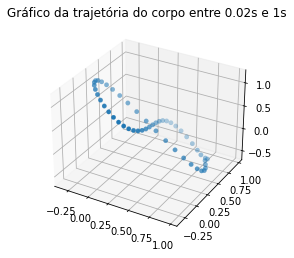

In [52]:
#plot do gráfico que mostra a trajetória da particula 
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(x_j, y_j, z_j, linewidth=0.2, antialiased=True)
plt.title('Gráfico da trajetória do corpo entre 0.02s e 1s')